# Research Question 3

Are there gender differences in different types of cardiovascular diseases (CVD)?

## Data exploration and pre-processing
'SEX' attribute has only two categories. We use LabelEncoder to label them as categorical variables. 

## Data analysis
We use Kmeans clustering, and 2D/3D visualization to present the data. 
Using the Elbow method, we can see the best number of clusters is between 4 and 5. 

## Results
Number of cluster between 4 and 5. 

## Limitations
No significant boundaries are identified from the visualization. Several sub-clusters might be hidden. 
In order to enhance the clustering, more features could be considered. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('brfss_for_bda_2021.csv')
data.fillna(data.mean())

,_STATE,_GEOSTR,_DENSTR2,PRECALL,SECSCRFL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,...,PPS_45,PPS_46,PPS_48,PPS_52,childage,cracorg1,_prace1,mracasc1,_impcty,mracorg1
0,New York,207,D,To be called,2.627151,40187,5,April,4092015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
1,New York,207,D,To be called,2.627151,60025,21,June,6232015,June,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
2,New York,203,D,To be called,2.627151,120050,3,December,12282015,December,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
3,New York,206,D,To be called,2.627151,30066,28,March,3182015,March,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
4,New York,203,D,To be called,2.627151,110026,23,November,11292015,November,...,No,No,No,No,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12333,New York,207,D,To be called,2.627151,40007,14,April,4162015,April,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12334,New York,207,D,To be called,0.000000,60048,8,June,7102015,July,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12335,New York,207,D,To be called,0.000000,70002,4,July,8152015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...
12336,New York,207,D,To be called,0.000000,70019,20,July,8092015,August,...,No,No,No,Yes,D,Data do not meet the criteria for statistical ...,D,D,D,Data do not meet the criteria for statistical ...


### NO. of entries for 'SEX'

***** SEX statistics *****
Female    7139
Male      5199
Name: SEX, dtype: int64


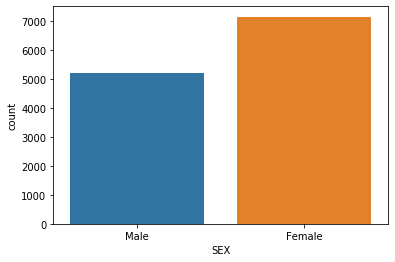

In [3]:
print("***** SEX statistics *****")
print(data.SEX.value_counts())
sns.countplot(x='SEX', data=data)

### Feature selection

In [4]:
# Feature selection
x=data[['CVDSTRK3','CVDINFR4','CVDCRHD4']]

In [6]:
# Labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(x['CVDSTRK3'])
x.CVDSTRK3 = le.transform(x.CVDSTRK3)
# ----------------------------
le = LabelEncoder()
le.fit(x['CVDINFR4'])
x.CVDINFR4 = le.transform(x.CVDINFR4)
# ----------------------------
le = LabelEncoder()
le.fit(x['CVDCRHD4'])
x.CVDCRHD4 = le.transform(x.CVDCRHD4)
x.to_csv('Result3.csv')

In [7]:
X=np.array(x[['CVDSTRK3','CVDINFR4']])
X_3=np.array(x[['CVDSTRK3','CVDINFR4','CVDCRHD4']])

In [10]:
X

array([[1, 1],
       [3, 0],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]])

In [11]:
X_3

array([[1, 1, 1],
       [3, 0, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

## Decide number of clusters with Elbow method

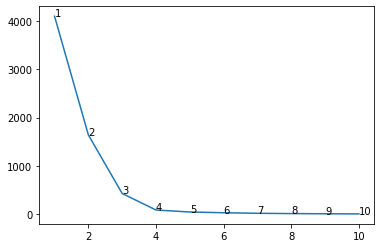

In [8]:
# determining number of K
k = np.arange(1,11)
jarr = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X)
    jarr.append(model.inertia_)
    # annotate points
    plt.annotate(str(i),(i,model.inertia_))
plt.plot(k,jarr)
plt.show()

### 2D Cluster visualization

*************************
当K等于 3
聚类中心的坐标：
[[0.99859637 0.99640319]
 [2.99522673 1.52267303]
 [0.99423077 2.99230769]]


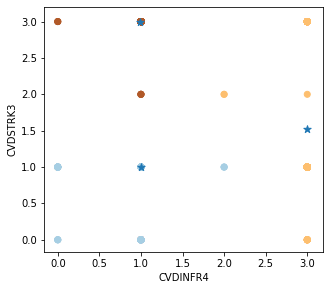

*************************
当K等于 4
聚类中心的坐标：
[[0.99833275 0.99640225]
 [0.99423077 2.99230769]
 [2.99016393 0.96065574]
 [2.98290598 2.97435897]]


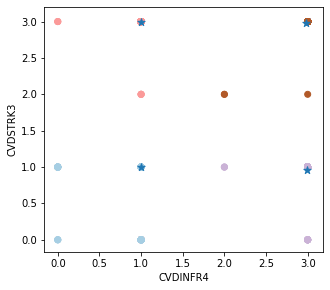

*************************
当K等于 5
聚类中心的坐标：
[[ 9.98679461e-01  1.00035214e+00]
 [ 9.94186047e-01  3.00000000e+00]
 [ 2.99016393e+00  9.60655738e-01]
 [ 2.98290598e+00  2.97435897e+00]
 [ 9.02439024e-01 -2.22044605e-16]]


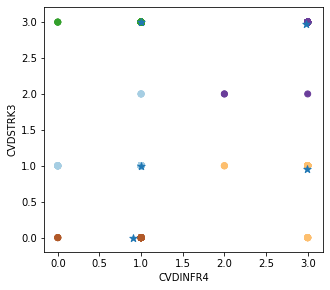

*************************
当K等于 6
聚类中心的坐标：
[[1.00026439 1.00035252]
 [0.99418605 3.        ]
 [3.         0.9602649 ]
 [2.98290598 2.97435897]
 [0.         0.78947368]
 [1.         0.        ]]


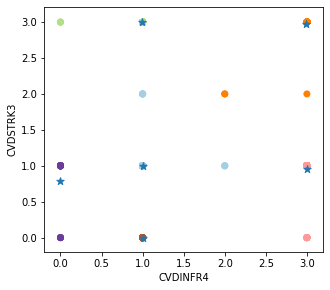

In [12]:
# 2D clusters
for K in range(3,7):
    model1 = KMeans(n_clusters=K)
    model1.fit(X)
    C_i = model1.predict(X)
    Muk = model1.cluster_centers_
    print('*'*25)
    print('When K equals',K)
    print('Center of the cluster')
    print(Muk)

    plt.figure(figsize=(5, 4.5))
    plt.subplot()
    plt.ylabel('CVDSTRK3')
    plt.xlabel('CVDINFR4')
    plt.scatter(X[:, 0], X[:, 1], c=C_i, cmap=plt.cm.Paired)
    plt.title = '2D Clusters'
    plt.scatter(Muk[:, 0], Muk[:, 1], marker='*', s=60)

    plt.show()

### 3D Clusters Visualization

<Figure size 1152x468 with 0 Axes>

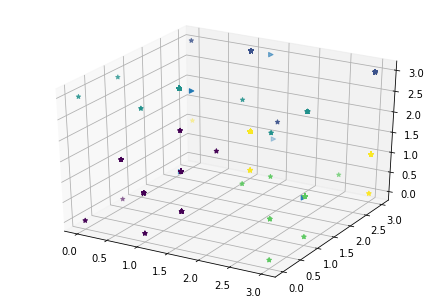

In [16]:
from mpl_toolkits.mplot3d import Axes3D
# 3d clusters
estimator = KMeans(n_clusters=5)
y = estimator.fit_predict(X_3)
label_pred = estimator.labels_
centroids = estimator.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_3[:, 0], X_3[:, 1], X_3[:, 2], c=y, marker='*')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='>')
# plt.axis([4, 6, 4, 8])
plt.show()